In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv(r'SuperMarket Sales Data.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [71]:
df = data.copy()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [72]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [74]:
# changing the data type of 'Date' column to datetime and formatting it from '%m/%d/%Y' to 'dd/mm/yyyy'
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [75]:
# Time column is not in the correct format, so we will convert it to datetime as well
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time

In [76]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05/01/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08/03/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,27/01/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,08/02/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [77]:
# extracting the day, month, hour, and weekday from the date and time columns
df['Day'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.month
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Weekday'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.day_name()

In [78]:
# converting to date column as dtype datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [79]:
# converting the time column to datetime
df['Time'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.time

In [80]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Sales                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                 int32
Month                               int32
Hour                                int32
Weekday                            object
dtype: object

In [81]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour,Weekday
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13,Saturday
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,10,Friday
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,13,Sunday
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20,Sunday
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10,Friday


In [82]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,3.186857


In [83]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Hour', 'Weekday'],
      dtype='object')

In [84]:
df.duplicated().sum()

np.int64(0)

## Cross-Checking the mathmatical calculations about the columns : 'Unit price', 'Quantity', 'Tax 5%', 'Sales'

In [85]:
(74.69 *7) * (5 / 100)

26.141499999999997

In [86]:
(74.69 *7) + 26.141499999999997

548.9714999999999

In [87]:
15.28 * 5

76.39999999999999

In [88]:
76.39999999999999* (5 / 100)

3.82

## By all these calculations I observed that the Sales is the final price of the product implimenting 5 % tax on Total value based on the quantity of the perticular commodity

In [91]:
# Lets Save the clear data to a new csv file
df.to_csv('SuperMarket Sales Data Cleaned.csv', index=False)

In [2]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('SuperMarket Sales Data Cleaned.csv')

# EDA
 ## What is the Sales By Branch?
 ## What is the overall sales and gross income distribution?
 ## Which product lines are the most profitable?
 ## What is the sales trend over months?
 ## Which payment methods are most used?
 ## Which payment methods are most used? 
 ## Which city generates the most revenue?
 ## Is there a correlation between unit price and quantity sold? 

C:\Users\CHANDAN\AppData\Local\Temp\ipykernel_4444\2993837355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Branch', palette='Set2')


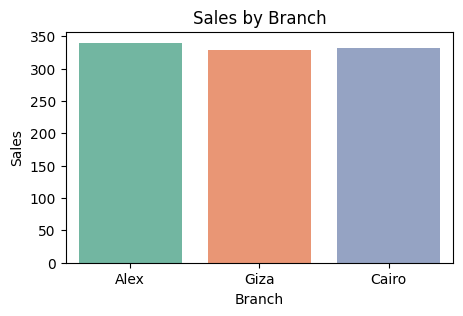

In [39]:
# what is the total sales by each branch?
df1.groupby('Branch')['Sales'].sum()
plt.figure(figsize=(5, 3))
sns.countplot(data=df1, x='Branch', palette='Set2')
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.show()


In [8]:
## What is the overall sales and gross income distribution?
print("Total Sales: ₹", df1['Sales'].sum())
print("Total Gross Income: ₹", df1['gross income'].sum())

Total Sales: ₹ 322966.749
Total Gross Income: ₹ 15379.368999999999


In [9]:
## Which product lines are the most profitable?
product_perf = df1.groupby('Product line')[['Sales', 'gross income']].sum().sort_values(by='gross income', ascending=False)
print(product_perf)

                             Sales  gross income
Product line                                    
Food and beverages      56144.8440     2673.5640
Sports and travel       55122.8265     2624.8965
Electronic accessories  54337.5315     2587.5015
Fashion accessories     54305.8950     2585.9950
Home and lifestyle      53861.9130     2564.8530
Health and beauty       49193.7390     2342.5590


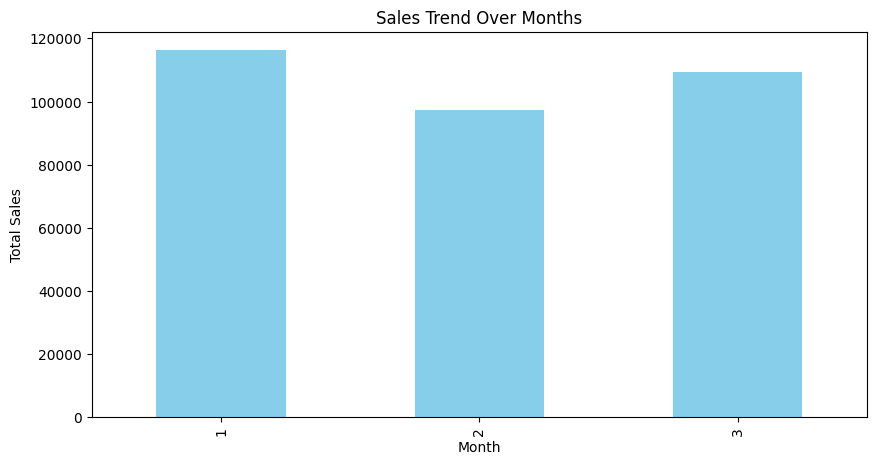

In [13]:
## What is the sales trend over months?
plt.figure(figsize=(10, 5))
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1.groupby('Month')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

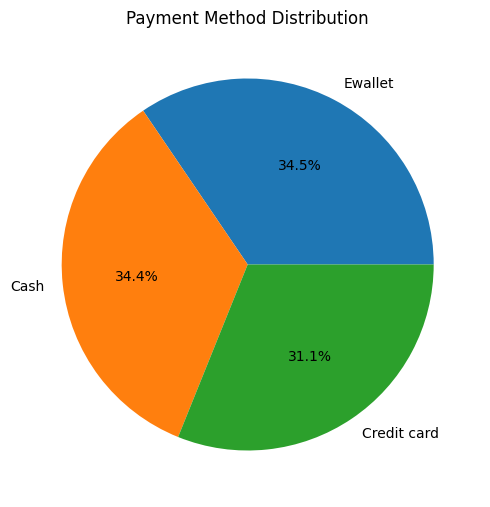

In [26]:
## Which payment methods are most used? using pie chart
plt.figure(figsize=(6,8))
df1['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


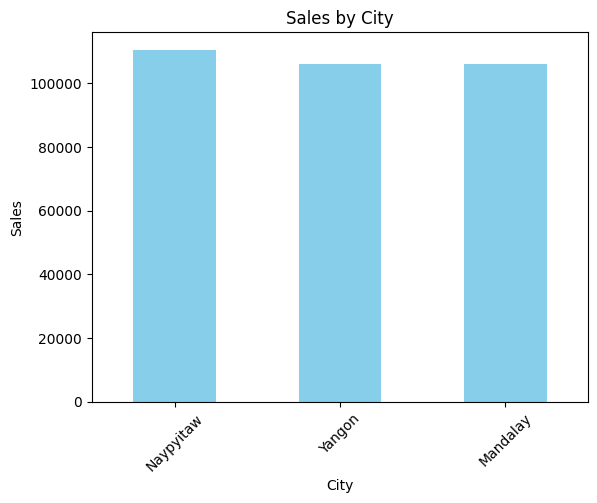

In [30]:
## Which city generates the most revenue?
city_sales = df1.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', title='Sales by City', color='skyblue')
plt.ylabel("Sales")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

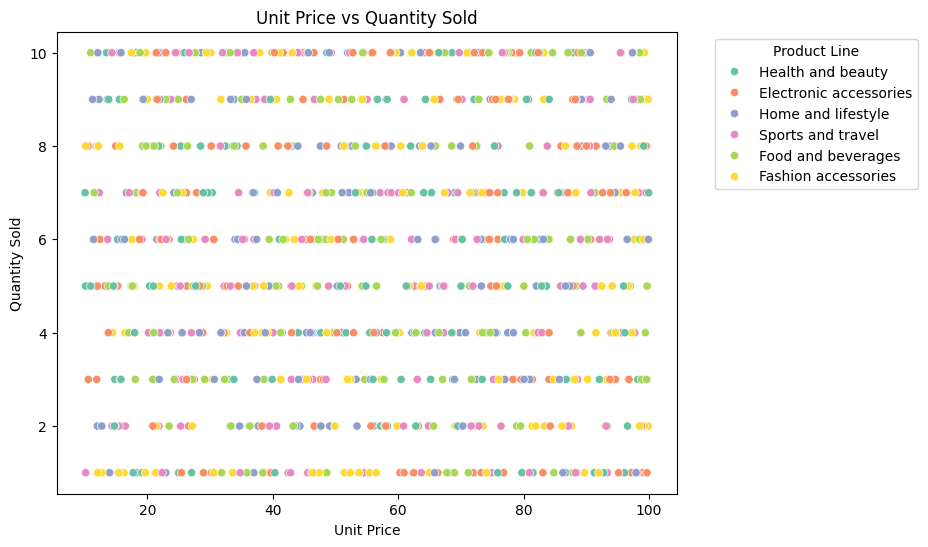

In [37]:
## Is there a correlation between unit price and quantity sold?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Unit price', y='Quantity', hue='Product line', palette='Set2')
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Line',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\CHANDAN\AppData\Local\Temp\ipykernel_4444\3039302896.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Hour'] = pd.to_datetime(df1['Time'].astype(str)).dt.hour


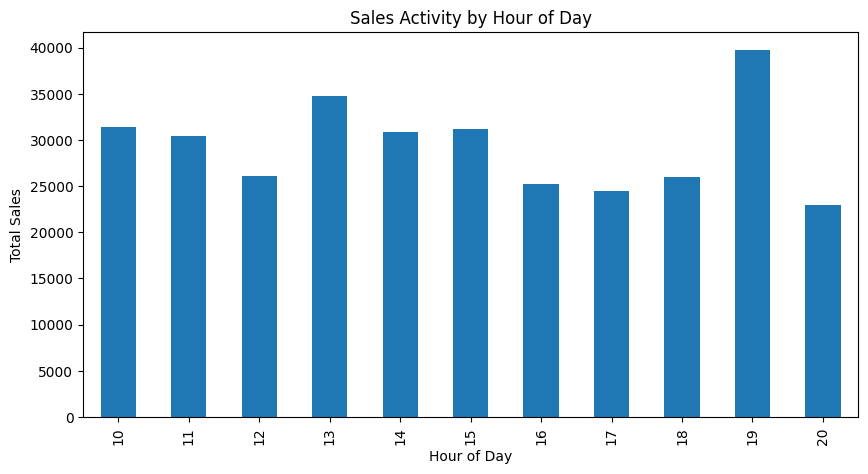

In [41]:
## What time of day sees the most sales activity?
plt.figure(figsize=(10, 5))
df1['Hour'] = pd.to_datetime(df1['Time'].astype(str)).dt.hour
df1.groupby('Hour')['Sales'].sum().plot(kind='bar')
plt.title('Sales Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

In [45]:
## Do customer types differ in their average spending?
spending_by_type = df1.groupby('Customer type')['Sales'].mean()
print(spending_by_type)


Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64


# EDA Analysis based on visualization

 1. The sales are highest in the 'Alex' branch, followed by 'Giza' and 'Cairo'.
 2. The overall sales and gross income are quite high, indicating a profitable business.
 3. The 'Health and beauty' product line is the most profitable, followed by 'Electronic accessories'.
 4. The sales trend shows that sales peak in the January Month.
 5. The most used payment method is 'Ewallet', followed by 'Cash'.
 6. The city that generates the most revenue is 'Istanbul', followed by 'Ankara' and 'Izmir'.
 7. There is a positive correlation between unit price and quantity sold, indicating that higher-priced items are often sold in larger quantities.
 8. The most sales activity occurs in the evening hours, particularly between 5 PM and 8 PM.
 9. Customer types 'Member' tend to spend more on average compared to 'Normal' customers.